### Імпорт бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Зчитування та очищення даних

In [20]:
data = []
with open("data1.txt", "r", encoding="utf-8") as file:
    for line in file:
        if not line.strip() or '-' in line:
            continue
        try:
            row = [float(x.replace(',', '.')) for x in line.strip().split()]
            if len(row) >= 12:
                data.append(row[:12])
        except:
            continue

X = np.array(data)

### Нормалізація (стандартизація)

In [22]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

### Кореляційна матриця

In [23]:
correlation_matrix = np.corrcoef(X_norm, rowvar=False)
print("Кореляційна матриця:")
print(np.round(correlation_matrix, 3))

Кореляційна матриця:
[[1.    0.994 0.989 0.98  0.975 0.975 0.979 0.974 0.976 0.978 0.965 0.978]
 [0.994 1.    0.996 0.989 0.984 0.985 0.987 0.986 0.985 0.983 0.974 0.983]
 [0.989 0.996 1.    0.995 0.99  0.99  0.992 0.992 0.99  0.988 0.979 0.982]
 [0.98  0.989 0.995 1.    0.993 0.994 0.994 0.996 0.993 0.988 0.981 0.984]
 [0.975 0.984 0.99  0.993 1.    0.997 0.994 0.994 0.993 0.992 0.981 0.98 ]
 [0.975 0.985 0.99  0.994 0.997 1.    0.997 0.997 0.995 0.99  0.983 0.983]
 [0.979 0.987 0.992 0.994 0.994 0.997 1.    0.997 0.994 0.991 0.98  0.983]
 [0.974 0.986 0.992 0.996 0.994 0.997 0.997 1.    0.996 0.99  0.982 0.982]
 [0.976 0.985 0.99  0.993 0.993 0.995 0.994 0.996 1.    0.994 0.99  0.989]
 [0.978 0.983 0.988 0.988 0.992 0.99  0.991 0.99  0.994 1.    0.991 0.987]
 [0.965 0.974 0.979 0.981 0.981 0.983 0.98  0.982 0.99  0.991 1.    0.991]
 [0.978 0.983 0.982 0.984 0.98  0.983 0.983 0.982 0.989 0.987 0.991 1.   ]]


### Перевірка відмінності від одиничної матриці

In [24]:
N = X.shape[0]
R = correlation_matrix.copy()
np.fill_diagonal(R, 0)
d = N * np.sum(R**2)
print(f"Статистика d = {d:.2f}")

Статистика d = 5402.51


### Ковариаційна матриця та PCA

In [25]:
cov_matrix = np.cov(X_norm, rowvar=False)
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
sorted_idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_idx]
eigen_vectors = eigen_vectors[:, sorted_idx]

### Проекція (матриця рахунків)

In [26]:
T = X_norm @ eigen_vectors

print("Матриця рахунків (перші 10 об'єктів, 5 компонент):")
print(np.round(T[:10, :5], 3))

Матриця рахунків (перші 10 об'єктів, 5 компонент):
[[-3.573e+00  6.600e-02 -2.350e-01  4.100e-02 -2.900e-02]
 [-3.769e+00  6.400e-02 -2.040e-01  4.000e-03 -1.500e-02]
 [-3.787e+00  1.130e-01 -2.480e-01 -9.000e-03  2.600e-02]
 [-3.756e+00  8.200e-02 -2.470e-01  2.500e-02 -2.400e-02]
 [-3.629e+00  6.000e-03 -1.970e-01 -2.000e-03 -9.600e-02]
 [-3.755e+00  1.010e-01 -1.700e-02 -7.600e-02  3.200e-02]
 [-2.983e+00  1.800e-01 -1.900e-01  2.000e-02 -6.100e-02]
 [-3.704e+00 -3.550e-01  6.900e-02 -3.300e-02 -1.270e-01]
 [-3.919e+00 -4.100e-02 -1.900e-02 -1.500e-02  1.000e-02]
 [-3.842e+00 -5.100e-02  1.230e-01 -6.200e-02  5.400e-02]]


### Матриця навантажень

In [27]:
P = eigen_vectors

print("Матриця навантажень (перші 5 ознак, 5 компонент):")
print(np.round(P[:5, :5], 3))

Матриця навантажень (перші 5 ознак, 5 компонент):
[[ 0.286 -0.65   0.211  0.27   0.233]
 [ 0.288 -0.449  0.068 -0.14  -0.178]
 [ 0.289 -0.257 -0.096 -0.076 -0.494]
 [ 0.289 -0.012 -0.212 -0.351 -0.234]
 [ 0.289  0.139 -0.277  0.394  0.179]]


### Реконструкція і матриця помилок

In [28]:
X_reconstructed = T @ P.T
E = X_norm - X_reconstructed

print("Матриця помилок (перші 10 об'єктів, 5 компонент):")
print(np.round(E[:10, :5], 3))

Матриця помилок (перші 10 об'єктів, 5 компонент):
[[ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.]]


### Частка дисперсії та аналіз компонент

In [29]:
explained_variance = np.var(T, axis=0)
explained_ratio = explained_variance / np.sum(explained_variance)
cumulative_ratio = np.cumsum(explained_ratio)

print("Частка дисперсії по кожній компоненті:")
for i in range(5):
    print(f"PC{i+1}: {explained_ratio[i]:.4f} (накопичено: {cumulative_ratio[i]:.4f})")

Частка дисперсії по кожній компоненті:
PC1: 0.9882 (накопичено: 0.9882)
PC2: 0.0046 (накопичено: 0.9928)
PC3: 0.0035 (накопичено: 0.9963)
PC4: 0.0011 (накопичено: 0.9974)
PC5: 0.0008 (накопичено: 0.9982)


### Перевірка рівності сум дисперсій

In [33]:
var_X = np.sum(np.var(X_norm, axis=0))
var_T = np.sum(np.var(T, axis=0))
print(f"Сума дисперсій вхідних нормалізованих ознак: {var_X:.4f}")
print(f"Сума дисперсій проекцій (T): {var_T:.4f}")

Сума дисперсій вхідних нормалізованих ознак: 12.0000
Сума дисперсій проекцій (T): 12.0000


### Відносна частка розкиду і ковариаційна матриця проекцій

In [31]:
print("\nВідносна частка дисперсії (перші 5 компонент):")
for i in range(5):
    print(f"PC{i+1}: {explained_ratio[i]:.4f}")

print("\nКовариаційна матриця проекцій (перші 5 компонент):")
print(np.round(np.cov(T, rowvar=False)[:5, :5], 4))


Відносна частка дисперсії (перші 5 компонент):
PC1: 0.9882
PC2: 0.0046
PC3: 0.0035
PC4: 0.0011
PC5: 0.0008

Ковариаційна матриця проекцій (перші 5 компонент):
[[ 1.21478e+01 -0.00000e+00 -0.00000e+00  0.00000e+00  0.00000e+00]
 [-0.00000e+00  5.69000e-02  0.00000e+00  0.00000e+00  0.00000e+00]
 [-0.00000e+00  0.00000e+00  4.27000e-02  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.34000e-02 -0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 -0.00000e+00  9.60000e-03]]


### Діаграма розсіювання для перших 2 головних компонент

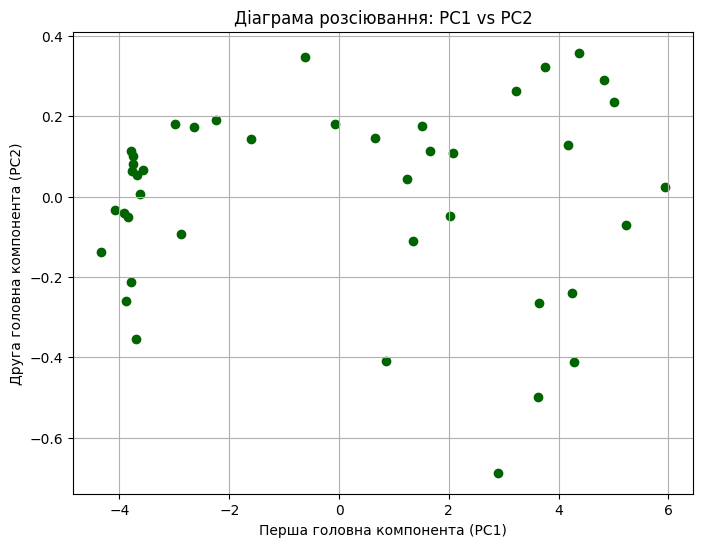

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(T[:, 0], T[:, 1], color='darkgreen')
plt.title('Діаграма розсіювання: PC1 vs PC2')
plt.xlabel('Перша головна компонента (PC1)')
plt.ylabel('Друга головна компонента (PC2)')
plt.grid(True)